# New York City Leading Causes of Death


The leading causes of death by sex and ethnicity in New York City in since 2007.

The Department of Health and Mental Hygiene (DOHMH) publishes its data on the leading causes of death in New York City from 2007 through 2011. You may view the data set on [NYC OpenData](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam). This is what it looks like:

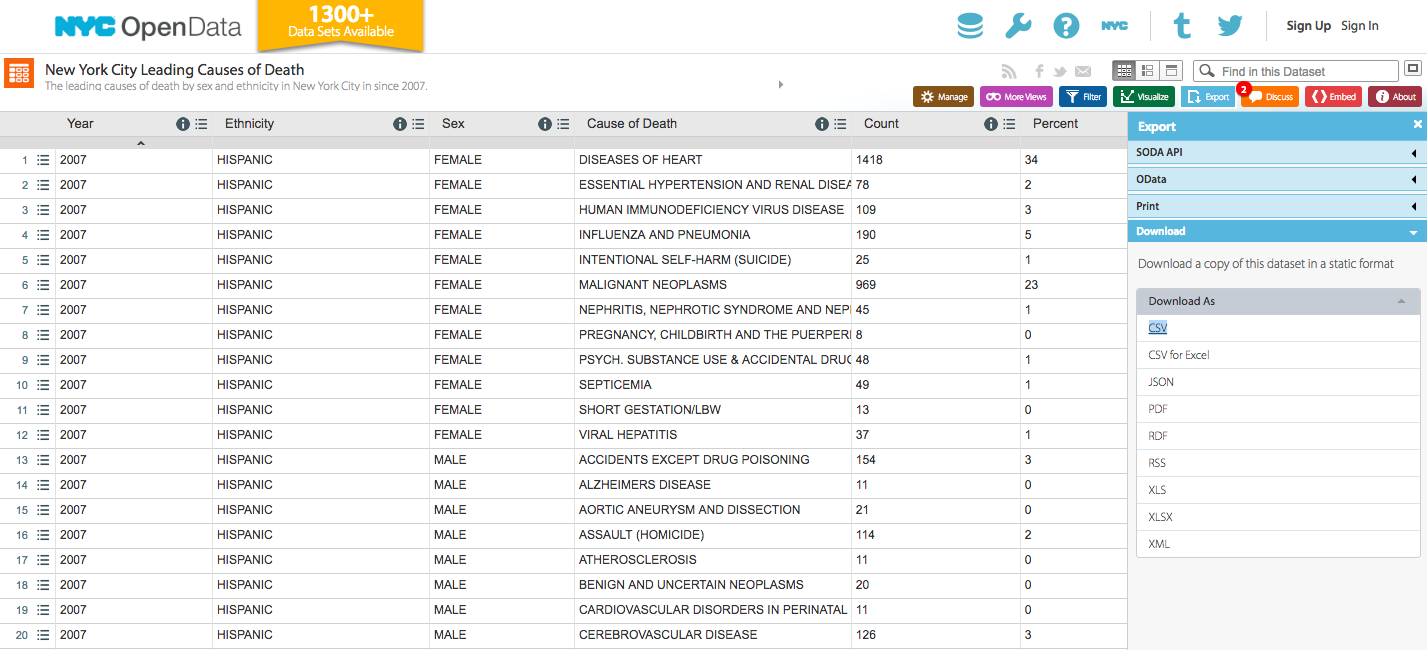

In [7]:
Image(filename = assets_path + "2016-05-19-fig2.png", width=5000, height=5000) # this depends on some code below

Let's see what this data tells us about health and death in New York CIty.

**A few data requests for the DOHMH:**
* DATE: Please include the dates of each death, rather than simply the year.
* HOSPITAL: Please include the address of the hospital where each individual passed away or was taken.
* AGE: Please include the age of individual at their time of birth.

With data requested above, we may be able to better understand the geography of health in New York City.

Below, let's use Python and several of its popular libraries to load, clean and explore the data.

## Set up the environment

Import the necessary libraries.

In [2]:
from datetime import datetime
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

Set some visual parameters.

In [3]:
# Bigger font sizes for plots
matplotlib.rcParams.update({'font.size': 32})
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rc('labelsize: large') 

# Do not truncate dataframe displays up to 500 columns
pd.set_option('display.max_columns', 500)

In [4]:
# See current working directory
os.getcwd()

'/Users/Will/notebooks'

In [5]:
# Change working directory to personal website/assets folder
os.chdir('/Users/Will/personal-website/assets')

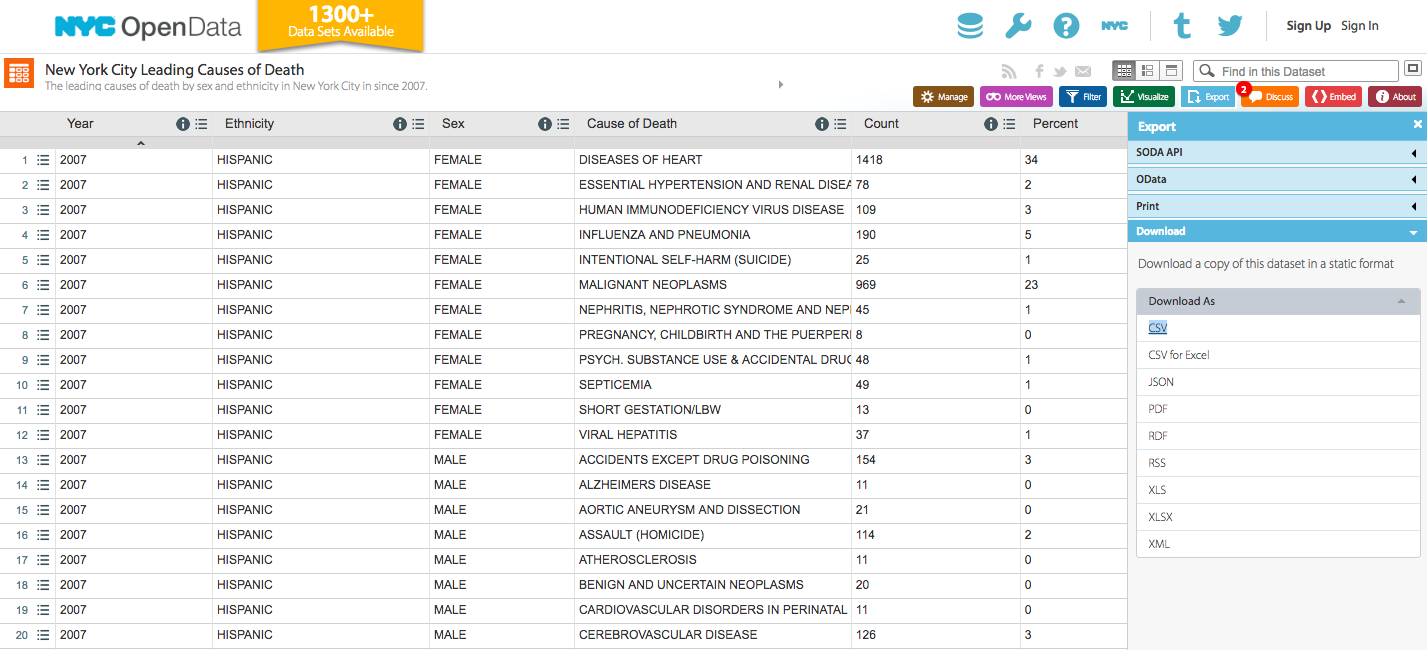

In [6]:
# Upload image
assets_path = "/Users/Will/personal-website/assets/" 
Image(filename = assets_path + "2016-05-19-fig2.png", width=5000, height=5000)

## Load the raw data

Download the csv directly from the NYC Open Data site and load it into a data frame.

In [8]:
url = 'https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.csv?accessType=DOWNLOAD'
raw_data = pd.read_csv(url)

Preview the `DataFrame` and see what `dtypes` its columns are.

In [9]:
raw_data.head()

,Year,Ethnicity,Sex,Cause of Death,Count,Percent
0,2010,NON-HISPANIC BLACK,MALE,HUMAN IMMUNODEFICIENCY VIRUS DISEASE,297,5
1,2010,NON-HISPANIC BLACK,MALE,INFLUENZA AND PNEUMONIA,201,3
2,2010,NON-HISPANIC BLACK,MALE,INTENTIONAL SELF-HARM (SUICIDE),64,1
3,2010,NON-HISPANIC BLACK,MALE,MALIGNANT NEOPLASMS,1540,23
4,2010,NON-HISPANIC BLACK,MALE,MENTAL DISORDERS DUE TO USE OF ALCOHOL,50,1


In [10]:
raw_data.dtypes

Year               int64
Ethnicity         object
Sex               object
Cause of Death    object
Count              int64
Percent            int64
dtype: object

## Clean the data

Assign the raw_data to a new `DataFrame` for cleaning.

In [11]:
df = raw_data

Convert columns to their appropriate `dtype`s. We'll want Ethnicity, Sex and Cause of Death to be categorical.

In [12]:
# Convert categorical columns to categories
df['Ethnicity'] = df['Ethnicity'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Cause of Death'] = df['Cause of Death'].astype('category')

# Convert Percent column to an actual percent
df['Percent'] = df['Percent']/100

In [32]:
df.head()

,Year,Ethnicity,Sex,Cause of Death,Count,Percent
0,2007,NON-HISPANIC BLACK,MALE,CHRONIC LIVER DISEASE AND CIRRHOSIS,78,0.01
1,2007,NON-HISPANIC WHITE,MALE,CEREBROVASCULAR DISEASE,267,0.02
2,2007,NON-HISPANIC WHITE,MALE,BENIGN AND UNCERTAIN NEOPLASMS,75,0.01
3,2007,NON-HISPANIC WHITE,MALE,ATHEROSCLEROSIS,45,0.00
4,2007,NON-HISPANIC WHITE,MALE,ASSAULT (HOMICIDE),41,0.00


In [14]:
df.dtypes

Year                 int64
Ethnicity         category
Sex               category
Cause of Death    category
Count                int64
Percent            float64
dtype: object

Sort the data chronologically.

In [15]:
# Sort by year
df.sort_values(by='Year', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,Year,Ethnicity,Sex,Cause of Death,Count,Percent
0,2007,NON-HISPANIC BLACK,MALE,CHRONIC LIVER DISEASE AND CIRRHOSIS,78,0.01
1,2007,NON-HISPANIC WHITE,MALE,CEREBROVASCULAR DISEASE,267,0.02
2,2007,NON-HISPANIC WHITE,MALE,BENIGN AND UNCERTAIN NEOPLASMS,75,0.01
3,2007,NON-HISPANIC WHITE,MALE,ATHEROSCLEROSIS,45,0.00
4,2007,NON-HISPANIC WHITE,MALE,ASSAULT (HOMICIDE),41,0.00


## Explore the data

See what categories (and how many) there are for each categorical column.

In [17]:
ethnicities = list(np.unique(df['Ethnicity']))
sex = list(np.unique(df['Sex']))
causes = list(np.unique(df['Cause of Death']))

print 'Ethnicities ({}):'.format(len(list(np.unique(df['Ethnicity'])))), ethnicities
print ""
print 'Sex ({}):'.format(len(list(np.unique(df['Sex'])))), sex
print ""
print 'Cause of Death ({}):'.format(len(list(np.unique(df['Cause of Death'])))), causes


Ethnicities (4): ['ASIAN & PACIFIC ISLANDER', 'HISPANIC', 'NON-HISPANIC BLACK', 'NON-HISPANIC WHITE']

Sex (2): ['FEMALE', 'MALE']

Cause of Death (32): ['ACCIDENTS EXCEPT DRUG POISONING', 'ALZHEIMERS DISEASE', 'ANEMIAS', 'AORTIC ANEURYSM AND DISSECTION', 'ASSAULT (HOMICIDE)', 'ATHEROSCLEROSIS', 'BENIGN AND UNCERTAIN NEOPLASMS', 'CARDIOVASCULAR DISORDERS IN PERINATAL PERIOD', 'CEREBROVASCULAR DISEASE', 'CHOLELITHIASIS AND DISORDERS OF GALLBLADDER', 'CHRONIC LIVER DISEASE AND CIRRHOSIS', 'CHRONIC LOWER RESPIRATORY DISEASES', 'CONGENITAL MALFORMATIONS,DEFORMATIONS', 'DIABETES MELLITUS', 'DISEASES OF HEART', 'ESSENTIAL HYPERTENSION AND RENAL DISEASES', 'HUMAN IMMUNODEFICIENCY VIRUS DISEASE', 'INFLUENZA AND PNEUMONIA', 'INTENTIONAL SELF-HARM (SUICIDE)', 'MALIGNANT NEOPLASMS', 'MENTAL DISORDERS DUE TO USE OF ALCOHOL', 'NEPHRITIS, NEPHROTIC SYNDROME AND NEPHROSIS', 'PARKINSONS DISEASE', 'PEPTIC ULCER', 'PNEUMONITIS DUE TO SOLIDS AND LIQUIDS', 'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM', 'PSYC

Use `groupby` and `sum` calculate the absolute number of deaths by category by year.

In [107]:
men = df[df['Sex'] == 'MALE']
women = df[df['Sex'] == 'FEMALE']

In [105]:
g_ethnicity = df['Count'].groupby([df['Year'], df['Ethnicity']]).sum().unstack()
g_sex = df['Count'].groupby([df['Year'], df['Sex']]).sum().unstack()
g_cause = df['Count'].groupby([df['Year'], df['Cause of Death']]).sum().unstack()

In [109]:
g_ethnicity_men = men['Count'].groupby([men['Year'], men['Ethnicity']]).sum().unstack()
g_ethnicity_women = women['Count'].groupby([women['Year'], women['Ethnicity']]).sum().unstack()

Make the death count plots.

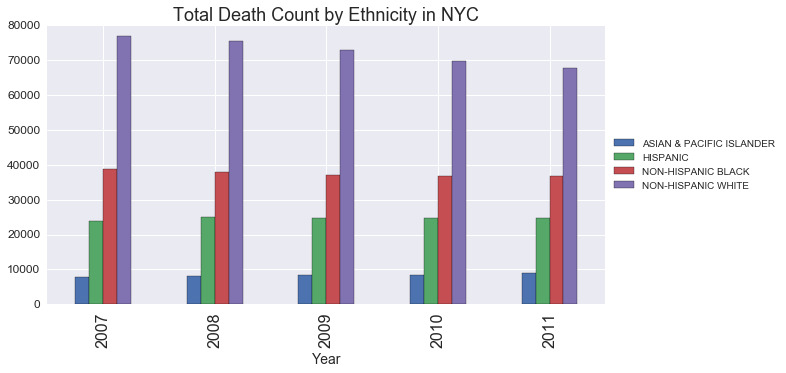

In [19]:
g_ethnicity.plot(kind='bar', figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Total Death Count by Ethnicity in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

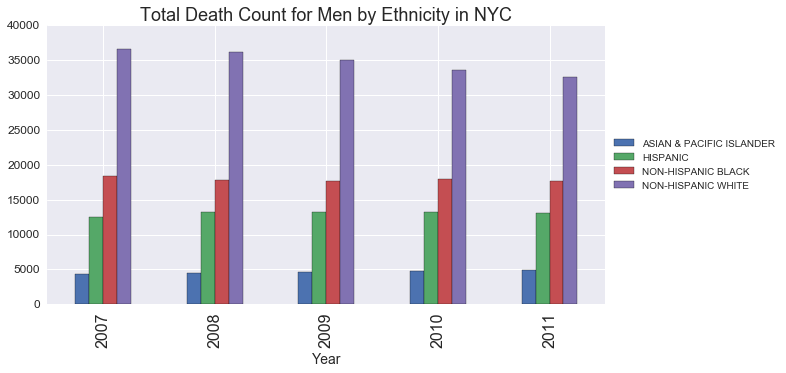

In [111]:
g_ethnicity_men.plot(kind='bar', figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Total Death Count for Men by Ethnicity in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

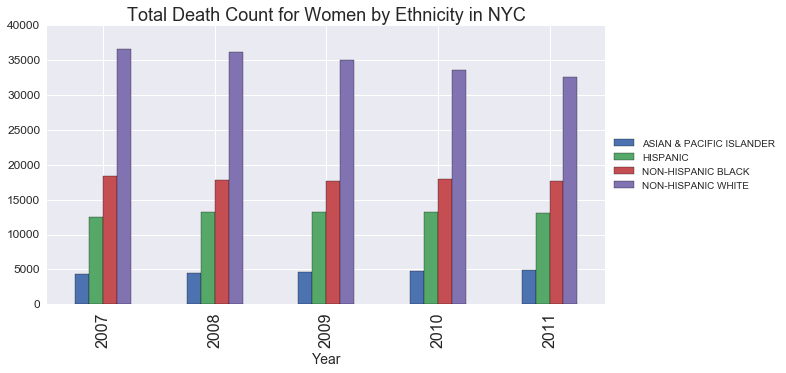

In [112]:
g_ethnicity_men.plot(kind='bar', figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Total Death Count for Women by Ethnicity in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

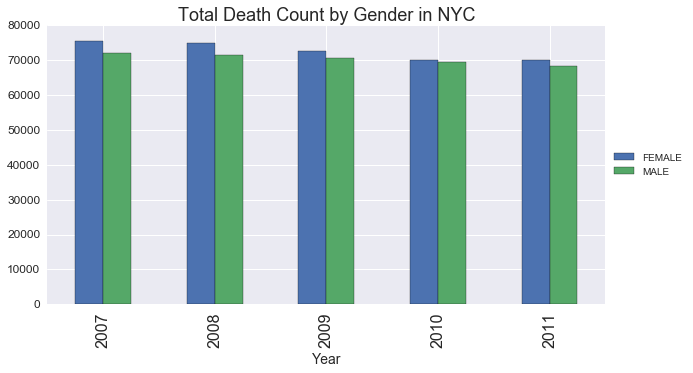

In [20]:
g_sex.plot(kind='bar', figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Total Death Count by Gender in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

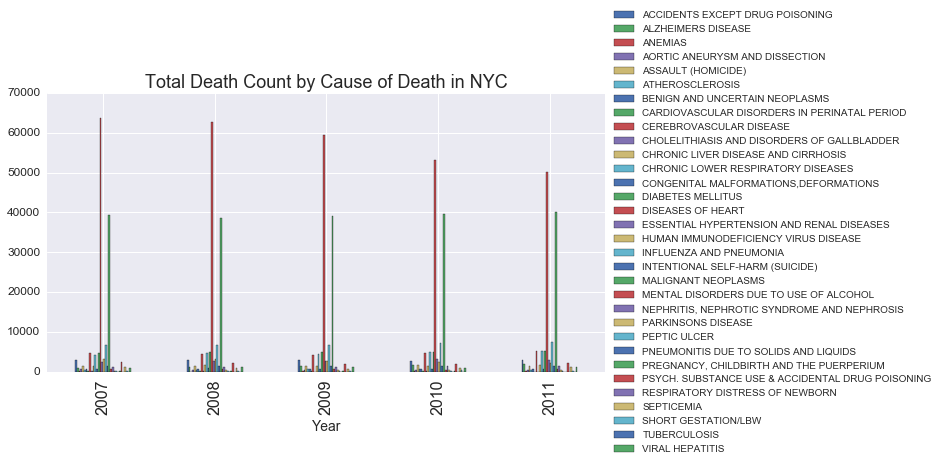

In [21]:
g_cause.plot(kind='bar', figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Total Death Count by Cause of Death in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

Whoa. While the Cause of Death chart above isn't very useful right now, it does suggest that two of the causes are much more common than the others. There are too many bars to see - but I'm going to guess that heart disease and cancer (i.e. malignant neoplasms) are the most common causes.

It's also interesting to note that the most common cause of death (which appears to be heart disease) is steadily declining from 2007 through 2011.

Let's start by examining the biggest cause of death - heart disease.

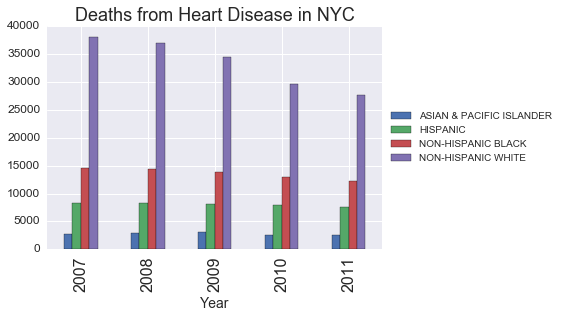

In [63]:
heart_disease = df[df['Cause of Death'] == 'DISEASES OF HEART']
g_heart_disease = heart_disease['Count'].groupby([heart_disease['Year'], heart_disease['Ethnicity']]).sum().unstack()
g_heart_disease.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Deaths from Heart Disease in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

In [75]:
g_heart_disease

Ethnicity,ASIAN & PACIFIC ISLANDER,HISPANIC,NON-HISPANIC BLACK,NON-HISPANIC WHITE
Year,,,,
2007,2775,8235,14529,38046
2008,3006,8325,14406,37017
2009,3012,8193,13809,34395
2010,2619,8013,12891,29538
2011,2562,7647,12249,27708


In [102]:
print "Deaths from heart disease among white people decreased {0:.0f}% from 2007 to 2011.".format((27708./38046.-1)*100)
print "Deaths from heart disease among black people decreased {0:.0f}% from 2007 to 2011.".format((12249./14529.-1)*100)
print "Deaths from heart disease among hispanic people decreased {0:.0f}% from 2007 to 2011.".format((7647./8235.-1)*100)
print "Deaths from heart disease among asian people decreased {0:.0f}% from 2007 to 2011.".format((2562./2775.-1)*100)

Deaths from heart disease among white people decreased -27% from 2007 to 2011.
Deaths from heart disease among black people decreased -16% from 2007 to 2011.
Deaths from heart disease among hispanic people decreased -7% from 2007 to 2011.
Deaths from heart disease among asian people decreased -8% from 2007 to 2011.


It turns out that deaths from heart disease has been dropping steadily in America since [1970](http://news.heart.org/heart-disease-death-rate-continues-to-drop/1204-feature-causes-of-death_progress/). One doctor attributes this trend to healthier diets, more exercise, reductions in cigarette smoking, use of high-blood pressure medication and widespread acceptance of statin drugs to control cholesterol levels (read more [here](http://www.webmd.com/heart/news/20140818/big-drop-in-us-heart-related-hospitalizations-and-deaths-study-finds)).

Deaths from heart disease in New York has dropped the most for white people. Why is that?

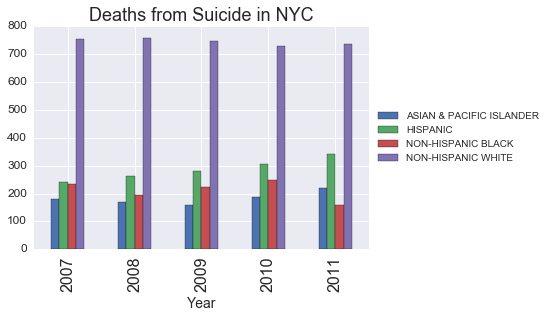

In [114]:
suicide = df[df['Cause of Death'] == 'INTENTIONAL SELF-HARM (SUICIDE)' ]
g_suicide = suicide['Count'].groupby([suicide['Year'], suicide['Ethnicity']]).sum().unstack()
g_suicide.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Deaths from Suicide in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

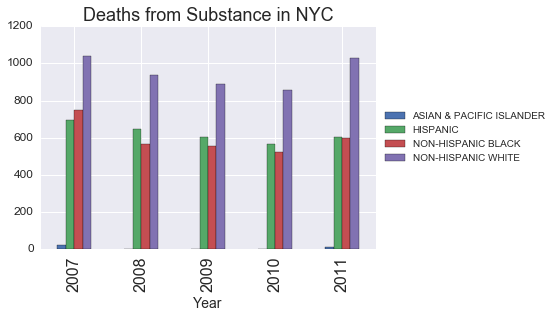

In [115]:
substance = df[df['Cause of Death'] == 'PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING' ]
g_substance = substance['Count'].groupby([substance['Year'], substance['Ethnicity']]).sum().unstack()
g_substance.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Deaths from Substance in NYC', fontsize=18)
plt.xlabel('Year',fontsize=14);

In [133]:
g_ethnicity_gender = df['Percent'].groupby([df['Year'], df['Ethnicity'], df['Sex'], df['Cause of Death']]).sum().unstack()
g_ethnicity_gender

Cause of Death                        ACCIDENTS EXCEPT DRUG POISONING  \
Year Ethnicity                Sex                                       
2007 ASIAN & PACIFIC ISLANDER FEMALE                             0.06   
                              MALE                               0.09   
     HISPANIC                 FEMALE                             0.06   
                              MALE                               0.09   
     NON-HISPANIC BLACK       FEMALE                             0.03   
                              MALE                               0.06   
     NON-HISPANIC WHITE       FEMALE                             0.03   
                              MALE                               0.06   
2008 ASIAN & PACIFIC ISLANDER FEMALE                             0.09   
                              MALE                               0.09   
     HISPANIC                 FEMALE                             0.06   
                              MALE                               0.12   
     NON-HISPANIC BLACK       FEMALE                             0.03   
                              MALE                               0.06   
     NON-HISPANIC WHITE       FEMALE                             0.03   
                              MALE                               0.06   
2009 ASIAN & PACIFIC ISLANDER FEMALE                             0.09   
                              MALE                               0.09   
     HISPANIC                 FEMALE                             0.03   
                              MALE                               0.09   
     NON-HISPANIC BLACK       FEMALE                             0.03   
                              MALE                               0.06   
     NON-HISPANIC WHITE       FEMALE                             0.03   
                              MALE                               0.06   
2010 ASIAN & PACIFIC ISLANDER FEMALE                             0.06   
                              MALE                               0.09   
     HISPANIC                 FEMALE                             0.03   
                              MALE                               0.09   
     NON-HISPANIC BLACK       FEMALE                             0.03   
                              MALE                               0.06   
     NON-HISPANIC WHITE       FEMALE                             0.03   
                              MALE                               0.06   
2011 ASIAN & PACIFIC ISLANDER FEMALE                             0.09   
                              MALE                               0.09   
     HISPANIC                 FEMALE                             0.03   
                              MALE                               0.12   
     NON-HISPANIC BLACK       FEMALE                             0.03   
                              MALE                               0.06   
     NON-HISPANIC WHITE       FEMALE                             0.03   
                              MALE                               0.06   

Cause of Death                        ALZHEIMERS DISEASE  ANEMIAS  \
Year Ethnicity                Sex                                   
2007 ASIAN & PACIFIC ISLANDER FEMALE                0.03      NaN   
                              MALE                   NaN      NaN   
     HISPANIC                 FEMALE                0.03      NaN   
                              MALE                  0.00      NaN   
     NON-HISPANIC BLACK       FEMALE                0.03      0.0   
                              MALE                  0.00      0.0   
     NON-HISPANIC WHITE       FEMALE                0.03      NaN   
                              MALE                  0.00      NaN   
2008 ASIAN & PACIFIC ISLANDER FEMALE                 NaN      NaN   
                              MALE                   NaN      NaN   
     HISPANIC                 FEMALE                0.03      NaN   
                              MALE  